In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
df.describe().style.format(precision=2).background_gradient(cmap='cividis') #precision rounds decimal values

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.00,301.00,301.00,301.00,301.00
mean,2013.63,4.66,7.63,36947.21,0.04
std,2.89,5.08,8.64,38886.88,0.25
min,2003.00,0.10,0.32,500.00,0.00
25%,2012.00,0.90,1.20,15000.00,0.00
50%,2014.00,3.60,6.40,32000.00,0.00
75%,2016.00,6.00,9.90,48767.00,0.00
max,2018.00,35.00,92.60,500000.00,3.00


In [17]:
print(f'Shape of this df--> {df.shape[0]} rows and {df.shape[1]} columns')

Shape of this df--> 301 rows and 9 columns


In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [20]:
df.duplicated().sum()

2

In [21]:
df.drop_duplicates(inplace=True)

In [23]:
print(df.isnull().any())
print('-'*60)
print(df.duplicated().any())

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool
------------------------------------------------------------
False


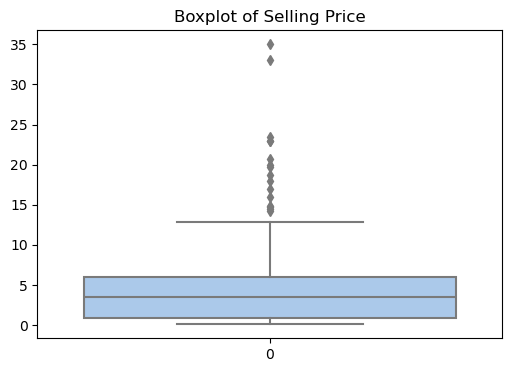

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(df['Selling_Price'],palette='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

In [33]:
numerical_col = [col for col in df.columns if df[col].dtype != 'object']
numerical_col

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [35]:
categorical_col = [col for col in df.columns if df[col].dtype == 'object']
categorical_col

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

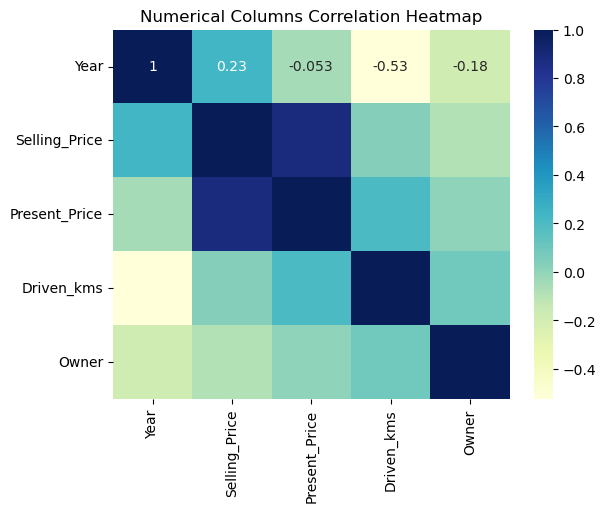

In [58]:
numerical_df = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']]
sns.heatmap(numerical_df.corr(),annot=True,cmap='YlGnBu')
plt.title('Numerical Columns Correlation Heatmap')
plt.show()

<Figure size 1000x600 with 0 Axes>

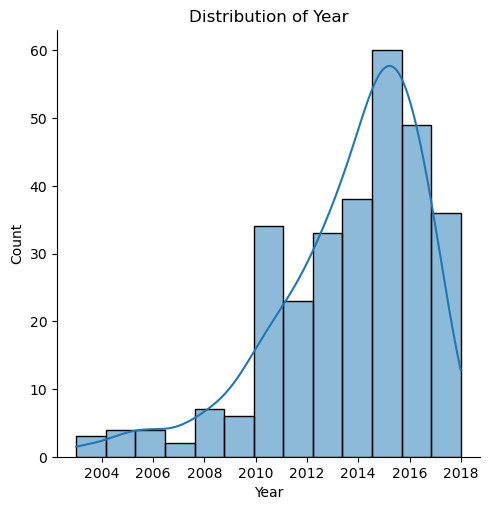

<Figure size 1000x600 with 0 Axes>

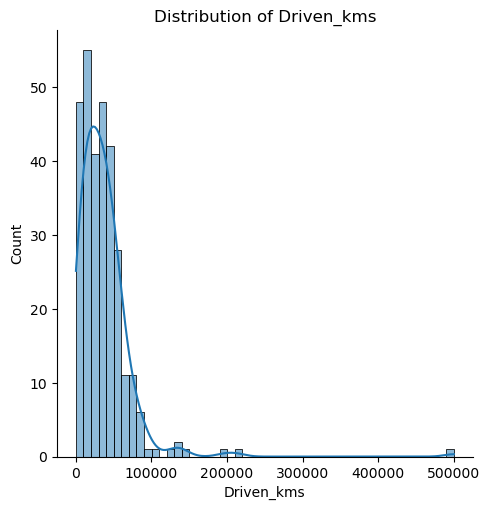

<Figure size 1000x600 with 0 Axes>

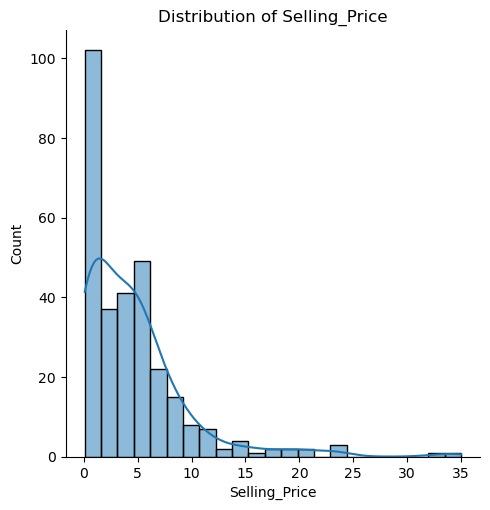

<Figure size 1000x600 with 0 Axes>

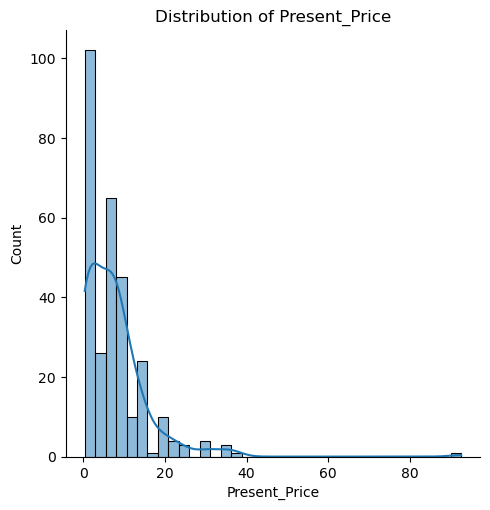

In [61]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [71]:
def plots(x, y='Selling_Price', data=df):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y}")
    sns.scatterplot(x=x, y=y, data=data)  # Passing x and y variables as keyword arguments
    plt.show()

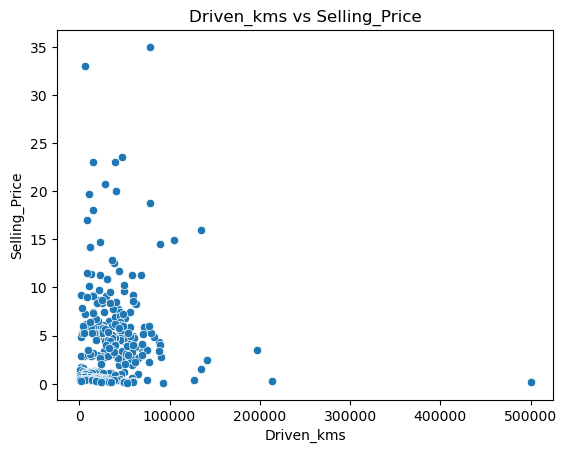

In [72]:
plots('Driven_kms')

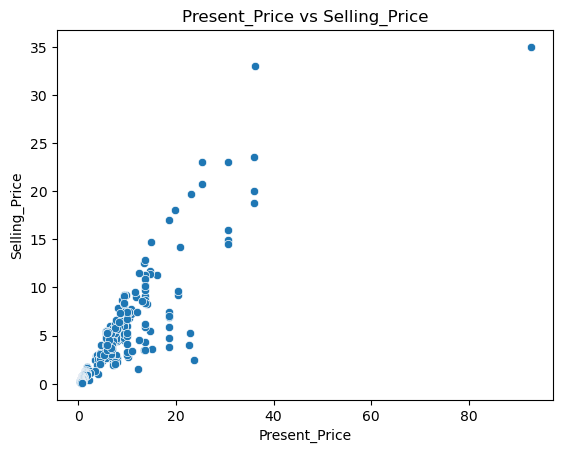

In [73]:
plots('Present_Price')

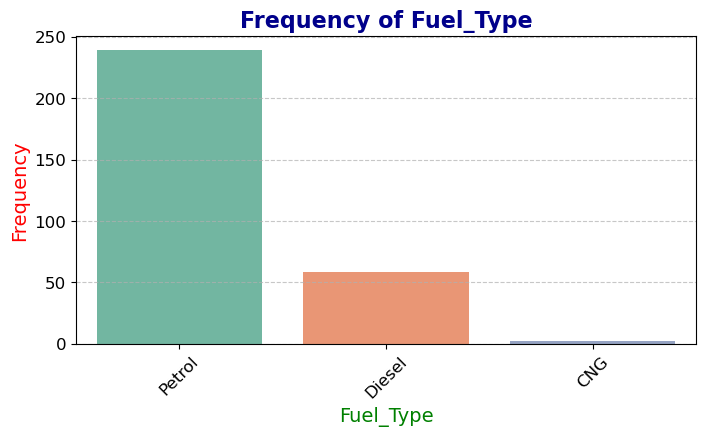

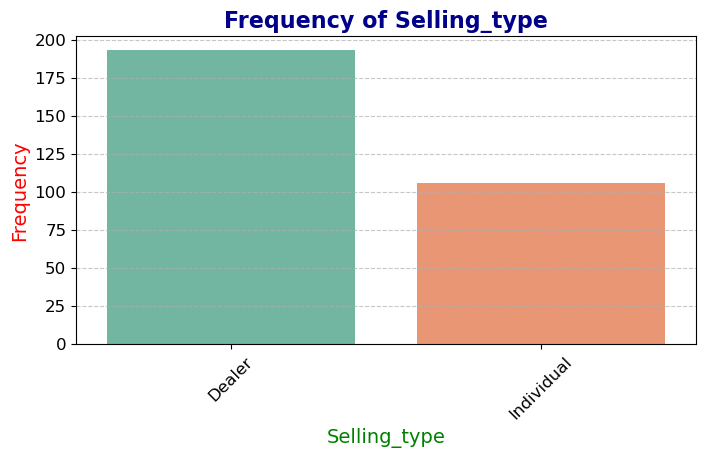

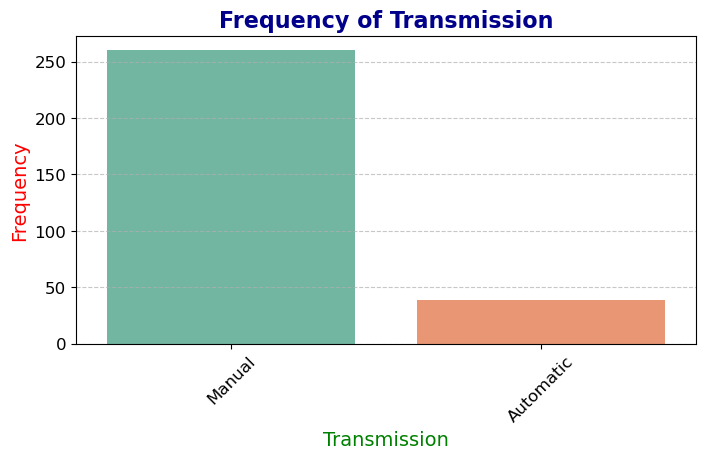

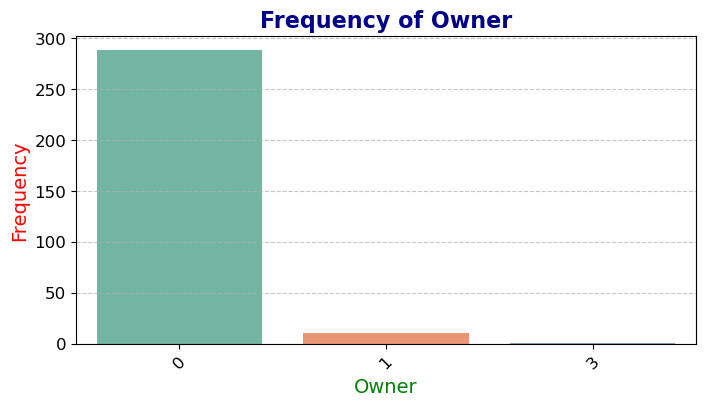

In [80]:
# Define a color palette for the plots
colors = sns.color_palette("Set2")
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission', 'Owner']
# Plot each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=df, palette=colors)
    plt.title(f'Frequency of {feature}', fontsize=16, color='darkblue', fontweight='bold')
    plt.xlabel(f'{feature}', fontsize=14, color='green')
    plt.ylabel('Frequency', fontsize=14, color='red')
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

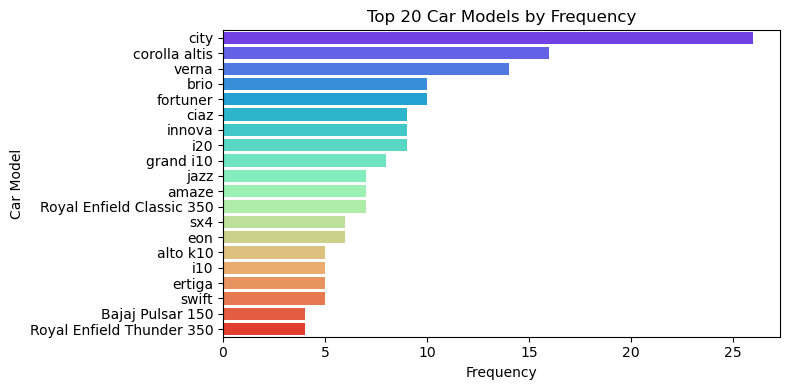

In [84]:
top_car_models = df['Car_Name'].value_counts().nlargest(20)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='rainbow')
plt.title(f'Top {20} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

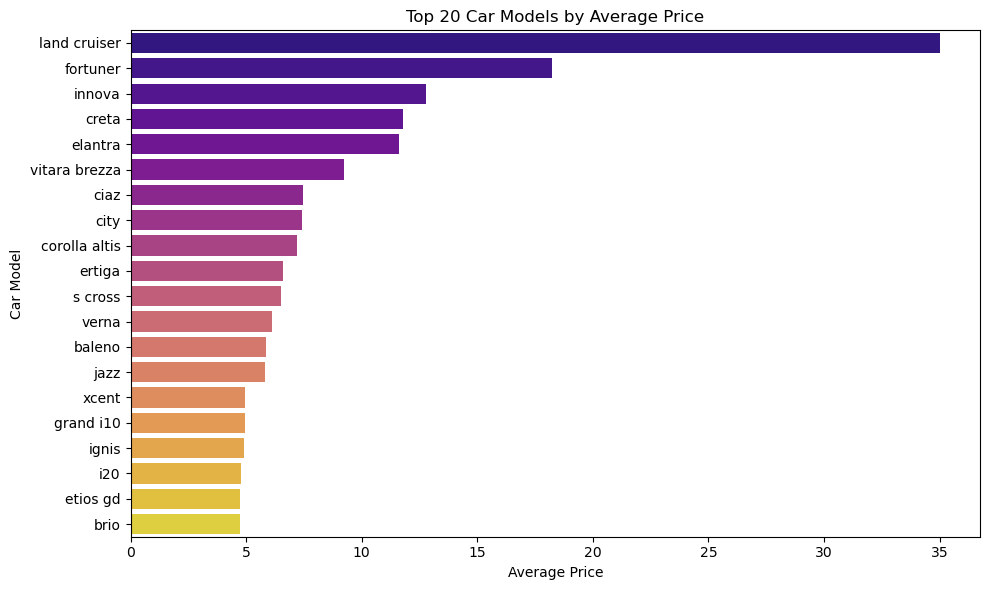

In [88]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top N car models by average price
top_car_models = avg_prices_by_car.nlargest(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index,palette='plasma')
plt.title(f'Top {20} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [92]:
def check_value_counts(df, columns):
    for col in columns:
        if col in df.columns:
            print(f"Value counts for column '{col}':")
            print(df[col].value_counts())
            print("-"*70)
        else:
            print(f"Column '{col}' not found in the DataFrame.")

In [93]:
columns_to_check = ['Fuel_Type', 'Selling_type', 'Transmission']
check_value_counts(df, columns_to_check)


Value counts for column 'Fuel_Type':
Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64
----------------------------------------------------------------------
Value counts for column 'Selling_type':
Dealer        193
Individual    106
Name: Selling_type, dtype: int64
----------------------------------------------------------------------
Value counts for column 'Transmission':
Manual       260
Automatic     39
Name: Transmission, dtype: int64
----------------------------------------------------------------------


In [127]:
x = df[['Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = df['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
categorical_col = [col for col in categorical_col if col != 'Car_Name']

In [129]:
preprocessor = ColumnTransformer(transformers = [('cat',OneHotEncoder(),categorical_col),('num',StandardScaler(),numerical_col)])

In [130]:
model = Pipeline(steps=[('preprocessor',preprocessor),('Regressor',LinearRegression())])

In [131]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Fuel_Type', 'Selling_type',
                                                   'Transmission']),
                                                 ('num', StandardScaler(),
                                                  ['Year', 'Selling_Price',
                                                   'Present_Price',
                                                   'Driven_kms', 'Owner'])])),
                ('Regressor', LinearRegression())])

In [133]:
from sklearn.metrics import r2_score,mean_squared_error
# Evaluate the model
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 9.81750492871171e-30
R-squared: 1.0
